In [10]:
!pip install matplotlib==3.5.3 matplotlib-inline==0.1.6 numpy==1.23.4 pandas seaborn==0.11.2 scipy xgboost scikit-learn

  Using cached matplotlib-3.5.3.tar.gz (35.2 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached numpy-1.23.4-cp311-cp311-win_amd64.whl (14.6 MB)
  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)
Failed to build matplotlib


  error: subprocess-exited-with-error
  
  × Building wheel for matplotlib (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [564 lines of output]
      
      Edit mplsetup.cfg to change the build options; suppress output with --quiet.
      
      BUILDING MATPLOTLIB
            python: yes [3.11.7 (tags/v3.11.7:fa7a6f2, Dec  4 2023, 19:24:49) [MSC
                        v.1937 64 bit (AMD64)]]
          platform: yes [win32]
             tests: no  [skipping due to configuration]
            macosx: no  [Mac OS-X only]
      
      C:\Users\Inteli\AppData\Local\Temp\pip-build-env-qldq9_o5\overlay\Lib\site-packages\setuptools\dist.py:674: SetuptoolsDeprecationWarning: The namespace_packages parameter is deprecated.
      !!
      
              ********************************************************************************
              Please replace its usage with implicit namespaces (PEP 420).
      
              See https://setuptools.pypa.io/en/latest/referenc

In [161]:
import psycopg2
import boto3
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from tempfile import mkdtemp
from shutil import rmtree
from sklearn import set_config
set_config(display = 'diagram')
import csv
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.ensemble import AdaBoostRegressor, VotingRegressor, GradientBoostingRegressor, StackingRegressor, RandomForestRegressor
from sklearn.feature_selection import SelectPercentile, mutual_info_regression, VarianceThreshold, SelectFromModel
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.metrics import make_scorer, mean_squared_error, mean_squared_log_error
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [11]:
host = 'default-workgroup.374171957244.us-east-1.redshift-serverless.amazonaws.com'
port = '5439'
database = 'group1'
user = 'admin'
password = 'Inteli90'

conn = psycopg2.connect(
    host=host,
    port=port,
    database=database,
    user=user,
    password=password
)

cursor = conn.cursor()

query = 'WITH cnpj_union AS (SELECT cnpj, sigla_uf FROM "group1"."public"."cnpj1" UNION SELECT CAST(cnpj AS character varying) AS cnpj, CAST(sigla_uf AS character varying) AS sigla_uf FROM "group1"."public"."cnpj2" UNION SELECT CAST(cnpj AS character varying) AS cnpj, CAST(sigla_uf AS character varying) AS sigla_uf FROM "group1"."public"."cnpj3" UNION SELECT CAST(cnpj AS character varying) AS cnpj, CAST(sigla_uf AS character varying) AS sigla_uf FROM "group1"."public"."cnpj4") SELECT * FROM cnpj_union INNER JOIN "group1"."public"."sale" ON cnpj_union.cnpj = sale.cnpj'


cursor.execute(query)

results = cursor.fetchall()

columns = [desc[0] for desc in cursor.description]

df = pd.DataFrame(results, columns=columns)

df.to_csv('cnpj.csv', index=False)

print(results)

[('42030061000141', 'SP', 20418, 42030061000141, 11, "{'id': 11, 'name': 'Salsicha', 'isActive': True}", '2023-07-14T00:00:00', 266.0, 57), ('20396661000195', 'RS', 11121, 20396661000195, 17, "{'id': 17, 'name': 'Queijo', 'isActive': True}", '2023-04-13T00:00:00', 274.0, 28), ('13635277000132', 'MG', 17049, 13635277000132, 14, "{'id': 14, 'name': 'Sabao em Po', 'isActive': True}", '2023-06-11T00:00:00', 347.0, 50), ('44160035000163', 'MG', 28014, 44160035000163, 18, "{'id': 18, 'name': 'Refrigerante', 'isActive': True}", '2023-09-28T00:00:00', 882.0, 50), ('44855312000152', 'RJ', 10785, 44855312000152, 7, "{'id': 7, 'name': 'Feijao', 'isActive': True}", '2023-04-10T00:00:00', 342.0, 49), ('27837557000138', 'RJ', 11438, 27837557000138, 9, "{'id': 9, 'name': 'Molho de Tomate', 'isActive': True}", '2023-04-16T00:00:00', 496.0, 88), ('44542945000100', 'PI', 32415, 44542945000100, 29, "{'id': 29, 'name': 'Teclado', 'isActive': True}", '2023-11-11T00:00:11.193', 615.0, 21), ('41305933000174'

In [163]:
df_cnpj = pd.read_csv('cnpj.csv')
df_cnpj

cnpj sigla_uf     id          cnpj.1  idcategory  \
0      42030061000141       SP  20418  42030061000141          11   
1      20396661000195       RS  11121  20396661000195          17   
2      13635277000132       MG  17049  13635277000132          14   
3      44160035000163       MG  28014  44160035000163          18   
4      44855312000152       RJ  10785  44855312000152           7   
...               ...      ...    ...             ...         ...   
31657  37525491000102       SC  13655  37525491000102          25   
31658  34204406000108       RJ  29520  34204406000108           8   
31659  46835998000145       SP  26646  46835998000145          30   
31660  35761370000126       SP  19626  35761370000126           8   
31661  42208565000109       SP  21839  42208565000109          15   

                                                category  \
0       {'id': 11, 'name': 'Salsicha', 'isActive': True}   
1         {'id': 17, 'name': 'Queijo', 'isActive': True}   
2      {'id': 14, 'name': 'Sabao em Po', 'isActive': ...   
3      {'id': 18, 'name': 'Refrigerante', 'isActive':...   
4          {'id': 7, 'name': 'Feijao', 'isActive': True}   
...                                                  ...   
31657       {'id': 25, 'name': 'Sofa', 'isActive': True}   
31658    {'id': 8, 'name': 'Macarrao', 'isActive': True}   
31659      {'id': 30, 'name': 'Carne', 'isActive': True}   
31660    {'id': 8, 'name': 'Macarrao', 'isActive': True}   
31661  {'id': 15, 'name': 'Papel Higienico', 'isActiv...   

                      saledate  value  amount  
0          2023-07-14T00:00:00  266.0      57  
1          2023-04-13T00:00:00  274.0      28  
2          2023-06-11T00:00:00  347.0      50  
3          2023-09-28T00:00:00  882.0      50  
4          2023-04-10T00:00:00  342.0      49  
...                        ...    ...     ...  
31657      2023-05-08T00:00:00  429.0      94  
31658  2023-10-13T00:00:10.667  244.0      85  
31659      2023-09-14T00:00:00  921.0      51  
31660      2023-07-06T00:00:00  986.0      49  
31661      2023-07-28T00:00:00  783.0       8  

[31662 rows x 9 columns]

# Pré-processamento


In [164]:
X = df_cnpj.drop(columns=['cnpj'])
y = df_cnpj.cnpj

X.shape, y.shape

((31662, 8), (31662,))

In [165]:
X.dtypes.value_counts()

int64      4
object     3
float64    1
Name: count, dtype: int64

In [166]:
feat_categorical_nunique = X.select_dtypes(include='object').nunique()

In [167]:
feat_categorical_nunique.sum()

493

<Axes: >

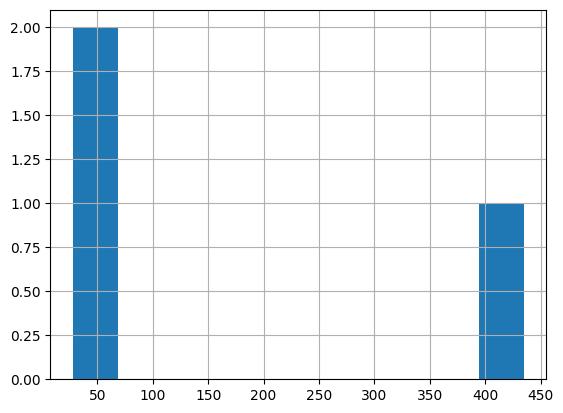

In [168]:
feat_categorical_nunique.hist()

In [169]:
feat_categorical_small = list(feat_categorical_nunique[feat_categorical_nunique < 7].index)


In [170]:
len(feat_categorical_small)

0

In [171]:
print(df_cnpj.columns)


Index(['cnpj', 'sigla_uf', 'id', 'cnpj.1', 'idcategory', 'category',
       'saledate', 'value', 'amount'],
      dtype='object')


In [172]:
colunas = ['uf_AC', 'uf_AL', 'uf_AM', 'uf_AP', 'uf_BA', 'uf_CE', 'uf_DF',
           'uf_ES', 'uf_EX', 'uf_GO', 'uf_MA', 'uf_MG', 'uf_MS', 'uf_MT', 'uf_PA',
           'uf_PB', 'uf_PE', 'uf_PI', 'uf_PR', 'uf_RJ', 'uf_RN', 'uf_RO', 'uf_RR',
           'uf_RS', 'uf_SC', 'uf_SE', 'uf_SP', 'uf_TO']

df_TabelaVerdade[colunas] = df_TabelaVerdade[colunas].replace({'zero': 0, 'um': 1})
df_TabelaVerdade[colunas] = df_TabelaVerdade[colunas].astype(int)


In [173]:
df_TabelaVerdade

cnpj sigla_uf     id          cnpj.1  idcategory  \
0      42030061000141       SP  20418  42030061000141          11   
1      20396661000195       RS  11121  20396661000195          17   
2      13635277000132       MG  17049  13635277000132          14   
3      44160035000163       MG  28014  44160035000163          18   
4      44855312000152       RJ  10785  44855312000152           7   
...               ...      ...    ...             ...         ...   
31657  37525491000102       SC  13655  37525491000102          25   
31658  34204406000108       RJ  29520  34204406000108           8   
31659  46835998000145       SP  26646  46835998000145          30   
31660  35761370000126       SP  19626  35761370000126           8   
31661  42208565000109       SP  21839  42208565000109          15   

                                                category  \
0       {'id': 11, 'name': 'Salsicha', 'isActive': True}   
1         {'id': 17, 'name': 'Queijo', 'isActive': True}   
2      {'id': 14, 'name': 'Sabao em Po', 'isActive': ...   
3      {'id': 18, 'name': 'Refrigerante', 'isActive':...   
4          {'id': 7, 'name': 'Feijao', 'isActive': True}   
...                                                  ...   
31657       {'id': 25, 'name': 'Sofa', 'isActive': True}   
31658    {'id': 8, 'name': 'Macarrao', 'isActive': True}   
31659      {'id': 30, 'name': 'Carne', 'isActive': True}   
31660    {'id': 8, 'name': 'Macarrao', 'isActive': True}   
31661  {'id': 15, 'name': 'Papel Higienico', 'isActiv...   

                      saledate  value  amount  uf_AC  ...  uf_RJ  uf_RN  \
0          2023-07-14T00:00:00  266.0      57      0  ...      0      0   
1          2023-04-13T00:00:00  274.0      28      0  ...      0      0   
2          2023-06-11T00:00:00  347.0      50      0  ...      0      0   
3          2023-09-28T00:00:00  882.0      50      0  ...      0      0   
4          2023-04-10T00:00:00  342.0      49      0  ...      1      0   
...                        ...    ...     ...    ...  ...    ...    ...   
31657      2023-05-08T00:00:00  429.0      94      0  ...      0      0   
31658  2023-10-13T00:00:10.667  244.0      85      0  ...      1      0   
31659      2023-09-14T00:00:00  921.0      51      0  ...      0      0   
31660      2023-07-06T00:00:00  986.0      49      0  ...      0      0   
31661      2023-07-28T00:00:00  783.0       8      0  ...      0      0   

       uf_RO  uf_RR  uf_RS  uf_SC  uf_SE  uf_SP  uf_TO  state_cluster  
0          0      0      0      0      0      1      0              0  
1          0      0      1      0      0      0      0              0  
2          0      0      0      0      0      0      0              1  
3          0      0      0      0      0      0      0              1  
4          0      0      0      0      0      0      0              3  
...      ...    ...    ...    ...    ...    ...    ...            ...  
31657      0      0      0      1      0      0      0              4  
31658      0      0      0      0      0      0      0              3  
31659      0      0      0      0      0      1      0              0  
31660      0      0      0      0      0      1      0              0  
31661      0      0      0      0      0      1      0              0  

[31662 rows x 38 columns]

# Modelos Ensemble

## K-Means


#### Cluesterização dos valores de compra pro região

In [174]:
columns_states = ['uf_AC', 'uf_AL', 'uf_AM', 'uf_AP', 'uf_BA', 'uf_CE', 'uf_DF',
                   'uf_ES', 'uf_EX', 'uf_GO', 'uf_MA', 'uf_MG', 'uf_MS', 'uf_MT', 'uf_PA',
                   'uf_PB', 'uf_PE', 'uf_PI', 'uf_PR', 'uf_RJ', 'uf_RN', 'uf_RO', 'uf_RR',
                   'uf_RS', 'uf_SC', 'uf_SE', 'uf_SP', 'uf_TO']

df_states = df_TabelaVerdade[columns_states]

scaler = StandardScaler()
df_states_scaled = scaler.fit_transform(df_states)

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_states_scaled)
    inertia.append(kmeans.inertia_)

C:\Users\Inteli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Inteli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



C:\Users\Inteli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Inteli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Inteli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Inteli\AppData\Local\Packages\Pyth

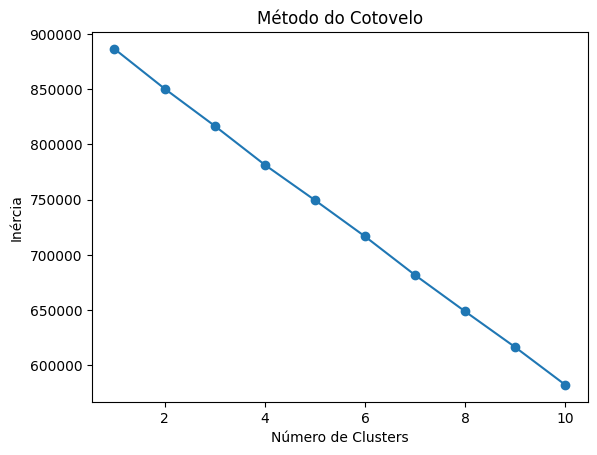

In [175]:
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo')
plt.show()

In [176]:
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df_TabelaVerdade['state_cluster'] = kmeans.fit_predict(df_states_scaled)

df_selected = df_TabelaVerdade[['cnpj', 'value', 'sigla_uf'] + columns_states + ['state_cluster']]

df_selected.to_csv('resultado_clusters.csv', index=False)

C:\Users\Inteli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [177]:
df_clusterizado = pd.read_csv('resultado_clusters.csv')
df_clusterizado

cnpj  value sigla_uf  uf_AC  uf_AL  uf_AM  uf_AP  uf_BA  \
0      42030061000141  266.0       SP      0      0      0      0      0   
1      20396661000195  274.0       RS      0      0      0      0      0   
2      13635277000132  347.0       MG      0      0      0      0      0   
3      44160035000163  882.0       MG      0      0      0      0      0   
4      44855312000152  342.0       RJ      0      0      0      0      0   
...               ...    ...      ...    ...    ...    ...    ...    ...   
31657  37525491000102  429.0       SC      0      0      0      0      0   
31658  34204406000108  244.0       RJ      0      0      0      0      0   
31659  46835998000145  921.0       SP      0      0      0      0      0   
31660  35761370000126  986.0       SP      0      0      0      0      0   
31661  42208565000109  783.0       SP      0      0      0      0      0   

       uf_CE  uf_DF  ...  uf_RJ  uf_RN  uf_RO  uf_RR  uf_RS  uf_SC  uf_SE  \
0          0      0  ...      0      0      0      0      0      0      0   
1          0      0  ...      0      0      0      0      1      0      0   
2          0      0  ...      0      0      0      0      0      0      0   
3          0      0  ...      0      0      0      0      0      0      0   
4          0      0  ...      1      0      0      0      0      0      0   
...      ...    ...  ...    ...    ...    ...    ...    ...    ...    ...   
31657      0      0  ...      0      0      0      0      0      1      0   
31658      0      0  ...      1      0      0      0      0      0      0   
31659      0      0  ...      0      0      0      0      0      0      0   
31660      0      0  ...      0      0      0      0      0      0      0   
31661      0      0  ...      0      0      0      0      0      0      0   

       uf_SP  uf_TO  state_cluster  
0          1      0              0  
1          0      0              0  
2          0      0              1  
3          0      0              1  
4          0      0              3  
...      ...    ...            ...  
31657      0      0              4  
31658      0      0              3  
31659      1      0              0  
31660      1      0              0  
31661      1      0              0  

[31662 rows x 32 columns]

In [178]:
print("Inércia:", kmeans.inertia_)

Inércia: 749543.388603093


In [180]:
df_means = df_clusterizado.groupby(['state_cluster'])['value'].mean().reset_index()
print(df_means)
df_means.to_csv('media_valores_por_cluster.csv', index=False)

   state_cluster       value
0              0  496.921463
1              1  495.880240
2              2  516.471182
3              3  506.744223
4              4  511.435997


In [181]:
df_means = pd.read_csv('media_valores_por_cluster.csv')
df_means

state_cluster       value
0              0  496.921463
1              1  495.880240
2              2  516.471182
3              3  506.744223
4              4  511.435997

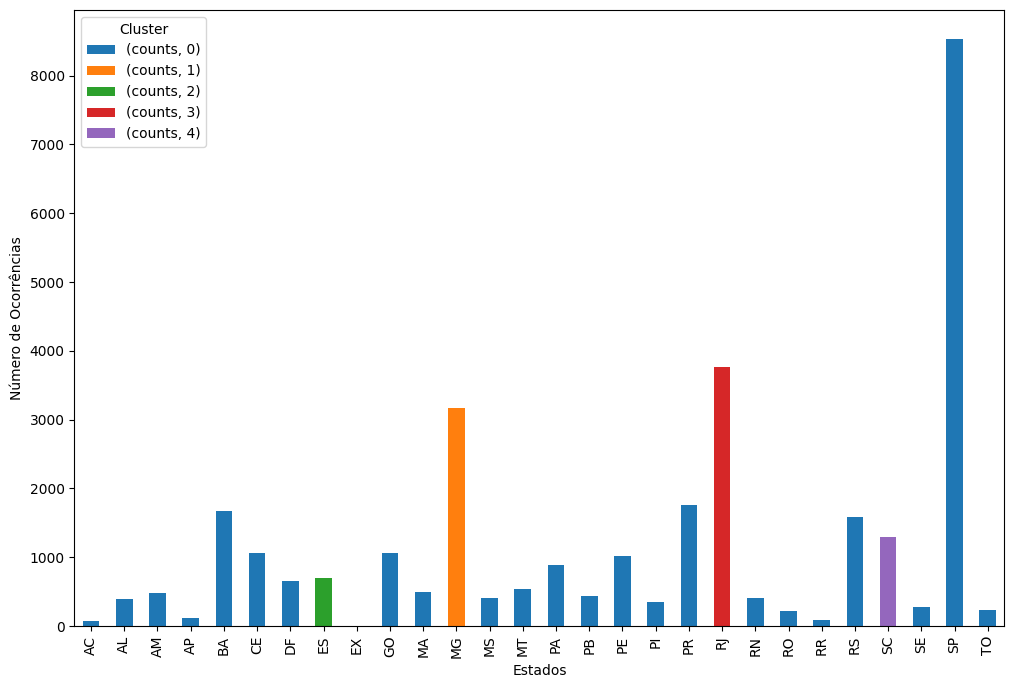

In [183]:
df_counts = df_clusterizado.groupby(['state_cluster', 'sigla_uf']).size().reset_index(name='counts')

df_counts.set_index(['state_cluster', 'sigla_uf'], inplace=True)

df_counts = df_counts.rename(columns=dict(zip(columns_states, state_names.values())))

fig, ax = plt.subplots(figsize=(12, 8))
df_counts.unstack('state_cluster').plot(kind='bar', stacked=True, ax=ax)

ax.legend(title='Cluster')
ax.set_ylabel('Número de Ocorrências')
ax.set_xlabel('Estados')

plt.show()



## Random Forest

### Previsão dos valores de compra conforme a categoria do produto

In [12]:
class RandomForestModel:
    def __init__(self):
        self.data = None
        self.model = None
        self.features = None
        self.target = None

    def load_data(self, file_path):
        self.data = pd.read_csv('cnpj.csv')

    def preprocess_data(self):
        self.features = self.data[['id', 'idcategory']]
        self.target = self.data['value']

    def train_model(self):
        X_train, X_test, y_train, y_test = train_test_split(self.features, self.target, test_size=0.2, random_state=42)
        self.model = RandomForestRegressor(n_estimators=100, random_state=42)
        self.model.fit(X_train, y_train)

        predictions = self.model.predict(X_test)
        mse = mean_squared_error(y_test, predictions)
        print(f'Mean Squared Error: {mse}')

    def predict(self, new_data):
        
        return self.model.predict(new_data)


random_forest_model = RandomForestModel()

random_forest_model.load_data('cnpj.csv')  # Substitua 'cnpj.csv' pelo caminho real do seu arquivo

random_forest_model.preprocess_data()


random_forest_model.train_model()


novos_dados = pd.DataFrame({'id': [1, 2], 'idcategory': [10, 15]})
previsoes = random_forest_model.predict(novos_dados)
print('Previsões:', previsoes)


Mean Squared Error: 103818.87830811621
Previsões: [801.66 725.04]
